In [329]:
# Importar pandas
import pandas as pd

# Armazenar e ler o dataframe
dados = pd.read_csv('/content/dados_tratados.csv')
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [330]:
# Remover colunas não trazem valor para a análise ou para os modelos preditivos
dados = dados.drop(columns=['customerID'], axis=1)

In [331]:
# Tratar coluna customer_gender
dados['customer_gender'] = dados['customer_gender'].replace({'Female':0, 'Male':1})
dados.head()

/tmp/ipython-input-296412672.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['customer_gender'] = dados['customer_gender'].replace({'Female':0, 'Male':1})


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0,0,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [332]:
print(dados.apply(pd.Series.unique))

Churn                                                                   [0, 1]
customer_gender                                                         [0, 1]
customer_SeniorCitizen                                                  [0, 1]
customer_Partner                                                        [1, 0]
customer_Dependents                                                     [1, 0]
customer_tenure              [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34...
phone_PhoneService                                                      [1, 0]
phone_MultipleLines                                   [0, 1, No phone service]
internet_InternetService                                 [DSL, Fiber optic, 0]
internet_OnlineSecurity                            [0, 1, No internet service]
internet_OnlineBackup                              [1, 0, No internet service]
internet_DeviceProtection                          [0, 1, No internet service]
internet_TechSupport                               [

In [333]:
lista = list(dados.columns)
colunas_categoricas = lista[7:18]
print(colunas_categoricas)
pd.get_dummies(dados, columns=colunas_categoricas)

['phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_Charges_Monthly,account_Charges_Total,Contas_Diarias,...,internet_StreamingMovies_No internet service,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_0,account_PaperlessBilling_1,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,65.60,593.30,2.19,...,False,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,59.90,542.40,2.00,...,False,True,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,73.90,280.85,2.46,...,False,True,False,False,False,True,False,False,True,False
3,1,1,1,1,0,13,1,98.00,1237.85,3.27,...,False,True,False,False,False,True,False,False,True,False
4,1,0,1,1,0,3,1,83.90,267.40,2.80,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,55.15,742.90,1.84,...,False,False,True,False,True,False,False,False,False,True
7263,1,1,0,1,0,22,1,85.10,1873.70,2.84,...,False,True,False,False,False,True,False,False,True,False
7264,0,1,0,0,0,2,1,50.30,92.75,1.68,...,False,True,False,False,False,True,False,False,False,True
7265,0,1,0,1,1,67,1,67.85,4627.65,2.26,...,False,False,False,True,True,False,False,False,False,True


In [334]:
# Transformando variáveis categóricas para numéricas
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados = one_hot_enc.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
dados

,onehotencoder__phone_MultipleLines_0,onehotencoder__phone_MultipleLines_1,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__internet_InternetService_0,onehotencoder__internet_InternetService_DSL,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__internet_OnlineSecurity_0,onehotencoder__internet_OnlineSecurity_1,onehotencoder__internet_OnlineSecurity_No internet service,onehotencoder__internet_OnlineBackup_0,...,remainder__Churn,remainder__customer_gender,remainder__customer_SeniorCitizen,remainder__customer_Partner,remainder__customer_Dependents,remainder__customer_tenure,remainder__phone_PhoneService,remainder__account_Charges_Monthly,remainder__account_Charges_Total,remainder__Contas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,9.0,1.0,65.60,593.30,2.19
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,59.90,542.40,2.00
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,4.0,1.0,73.90,280.85,2.46
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,13.0,1.0,98.00,1237.85,3.27
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,3.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,13.0,1.0,55.15,742.90,1.84
7263,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,22.0,1.0,85.10,1873.70,2.84
7264,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,50.30,92.75,1.68
7265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,67.85,4627.65,2.26


In [335]:
# Verificar proporção da evasão
dados.value_counts('remainder__Churn')

,count
remainder__Churn,
0.0,5398
1.0,1869


In [336]:
# verifica correlação com a variável de evasão
corr = dados.corr()['remainder__Churn']
corr

,remainder__Churn
onehotencoder__phone_MultipleLines_0,-0.031430
onehotencoder__phone_MultipleLines_1,0.039343
onehotencoder__phone_MultipleLines_No phone service,-0.012571
onehotencoder__internet_InternetService_0,-0.224051
onehotencoder__internet_InternetService_DSL,-0.120020
onehotencoder__internet_InternetService_Fiber optic,0.300949
onehotencoder__internet_OnlineSecurity_0,0.335656
onehotencoder__internet_OnlineSecurity_1,-0.166828
onehotencoder__internet_OnlineSecurity_No internet service,-0.224051
onehotencoder__internet_OnlineBackup_0,0.263111


In [337]:
# Correlação maior que 3
corr[corr > 0.3]

,remainder__Churn
onehotencoder__internet_InternetService_Fiber optic,0.300949
onehotencoder__internet_OnlineSecurity_0,0.335656
onehotencoder__internet_TechSupport_0,0.330446
onehotencoder__account_Contract_Month-to-month,0.395584
remainder__Churn,1.000000


In [338]:
# Correlação menor que -0.3
corr[corr < -0.3]

,remainder__Churn
remainder__customer_tenure,-0.344079


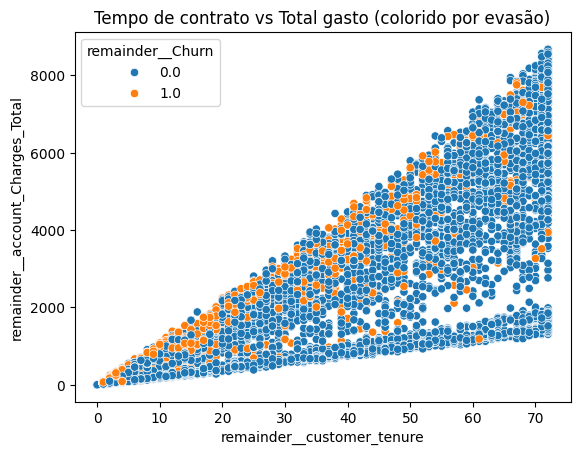

In [339]:
# Tempo de contrato vs Total gasto, colorindo por Churn
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='remainder__customer_tenure', y='remainder__account_Charges_Total', hue='remainder__Churn', data=dados)
plt.title("Tempo de contrato vs Total gasto (colorido por evasão)")
plt.show()


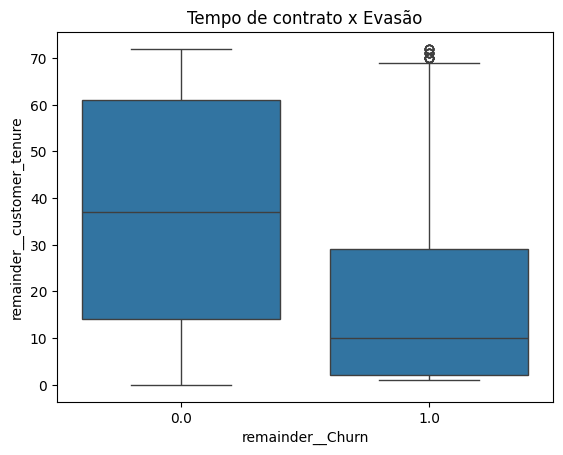

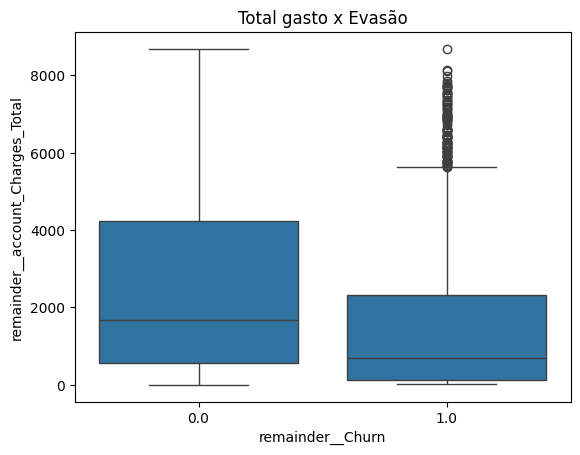

In [340]:
# Tempo de contrato x Churn
sns.boxplot(x='remainder__Churn', y='remainder__customer_tenure', data=dados)
plt.title("Tempo de contrato x Evasão")
plt.show()

# Total gasto x Churn
sns.boxplot(x='remainder__Churn', y='remainder__account_Charges_Total', data=dados)
plt.title("Total gasto x Evasão")
plt.show()


In [341]:
dados.columns

Index(['onehotencoder__phone_MultipleLines_0',
       'onehotencoder__phone_MultipleLines_1',
       'onehotencoder__phone_MultipleLines_No phone service',
       'onehotencoder__internet_InternetService_0',
       'onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_OnlineSecurity_0',
       'onehotencoder__internet_OnlineSecurity_1',
       'onehotencoder__internet_OnlineSecurity_No internet service',
       'onehotencoder__internet_OnlineBackup_0',
       'onehotencoder__internet_OnlineBackup_1',
       'onehotencoder__internet_OnlineBackup_No internet service',
       'onehotencoder__internet_DeviceProtection_0',
       'onehotencoder__internet_DeviceProtection_1',
       'onehotencoder__internet_DeviceProtection_No internet service',
       'onehotencoder__internet_TechSupport_0',
       'onehotencoder__internet_TechSupport_1',
       'onehotencoder__internet_TechSupport_No internet service',
 

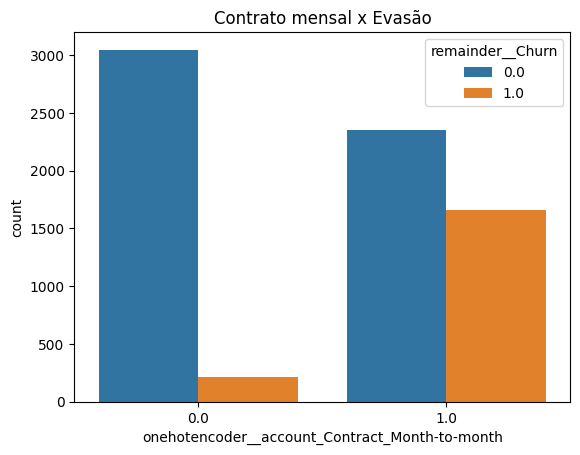

In [342]:
sns.countplot(x='onehotencoder__account_Contract_Month-to-month', hue='remainder__Churn', data=dados)
plt.title("Contrato mensal x Evasão")
plt.show()


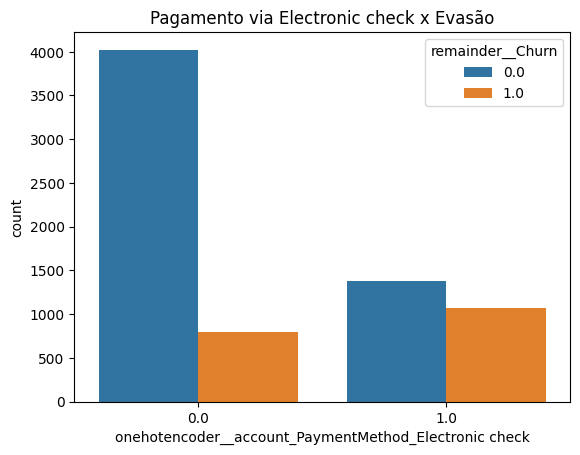

In [343]:
sns.countplot(x='onehotencoder__account_PaymentMethod_Electronic check', hue='remainder__Churn', data=dados)
plt.title("Pagamento via Electronic check x Evasão")
plt.show()


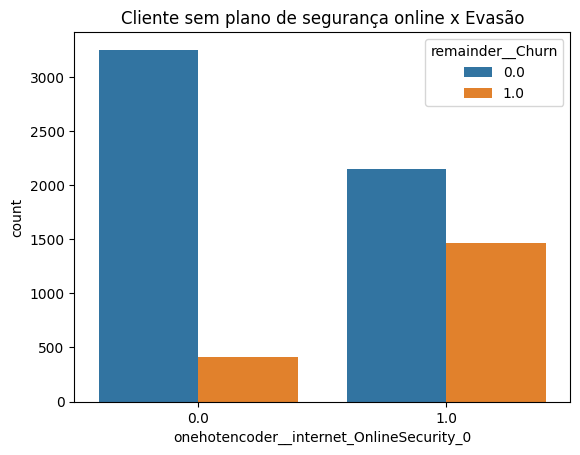

In [344]:
sns.countplot(x='onehotencoder__internet_OnlineSecurity_0', hue='remainder__Churn', data=dados)
plt.title("Cliente sem plano de segurança online x Evasão")
plt.show()

In [345]:
# Definindo variável dependente e explicativas
X = dados.drop(columns='remainder__Churn')
y = dados['remainder__Churn']

In [346]:
# Selecionando modelos de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify=y)

In [347]:
# Modelo base - DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

model_dummy = DummyClassifier()
model_dummy.fit(X_train, y_train)

acuracia_dummy = model_dummy.score(X_test, y_test)
print(f'Acurácia do modelo DummyClassifier: {acuracia_dummy:.2%}')

Acurácia do modelo DummyClassifier: 74.28%


In [348]:
# Modelo KNN - KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

acuracia_knn = model_knn.score(X_test, y_test)
print(f'Acurácia do modelo KNeighborsClassifier: {acuracia_knn:.2%}')

Acurácia do modelo KNeighborsClassifier: 75.88%


In [349]:
# Modelo Regressão Logística precisa normalizar dados
# Normaliza dados
from sklearn.preprocessing import StandardScaler

normaliza = StandardScaler()
X_train_normalizado = normaliza.fit_transform(X_train)
X_test_normalizado = normaliza.transform(X_test)

# Treina o modelo com os dados normalizados
# Modelo Regressão
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_normalizado, y_train)

acuracia_logreg = model_logreg.score(X_test_normalizado, y_test)
print(f'Acurácia do modelo LogisticRegression: {acuracia_logreg:.2%}')


Acurácia do modelo LogisticRegression: 78.91%


Acurácia do modelo DecisionTreeClassifier: 72.81%


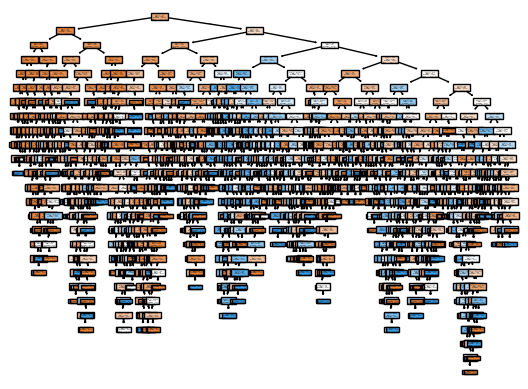

In [350]:
# Modelo DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_tree = DecisionTreeClassifier() # sem max_leaf_nodes, deixar o modelo complexo demais por questões didáticas
model_tree.fit(X_train, y_train)

acuracia_tree = model_tree.score(X_test, y_test)
print(f'Acurácia do modelo DecisionTreeClassifier: {acuracia_tree:.2%}')


plot_tree(model_tree, proportion=True, filled=True)
plt.show()

In [351]:
# Modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

acuracia_rfc = model_rfc.score(X_test, y_test)
print(f'Acurácia do modelo RandomForestClassifier: {acuracia_rfc:.2%}')

Acurácia do modelo RandomForestClassifier: 77.76%


In [352]:
'''
  Avaliar:
    Acurácia
    Precisão
    Recall
    F1-score
    Matriz de confusão
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



Acurácia: 74.28%
Precisão: 0.00%
Recall: 0.00%
F1-score: 0.00%
Erro UndefinedMetricWarning aparece pois o modelo previu somente um valor
      então algumas métricas ficam indefinidas.
Matriz de confusão:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


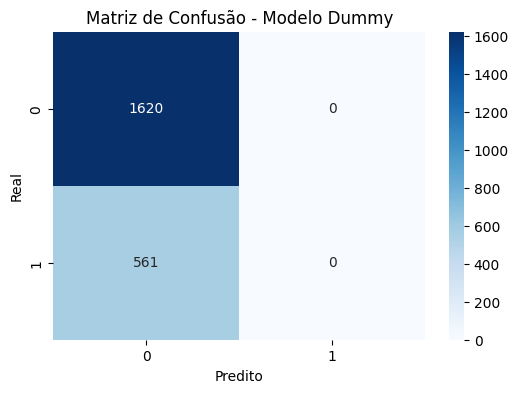

In [353]:
# Avaliar modelo base - DummyClassifier
y_pred_dummy = (model_dummy.predict(X_test))

print(f'Acurácia: {accuracy_score(y_test, y_pred_dummy):.2%}')
print(f'Precisão: {precision_score(y_test, y_pred_dummy):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_dummy):.2%}')
print(f'F1-score: {f1_score(y_test, y_pred_dummy):.2%}')
print('''Erro UndefinedMetricWarning aparece pois o modelo previu somente um valor
      então algumas métricas ficam indefinidas.''')
print('Matriz de confusão:')

cm = confusion_matrix(y_test, y_pred_dummy)

# Plot com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo Dummy")

plt.show()

Acurácia: 75.88%
Precisão: 54.30%
Recall: 39.39%
F1-score: 45.66%
Matriz de confusão:


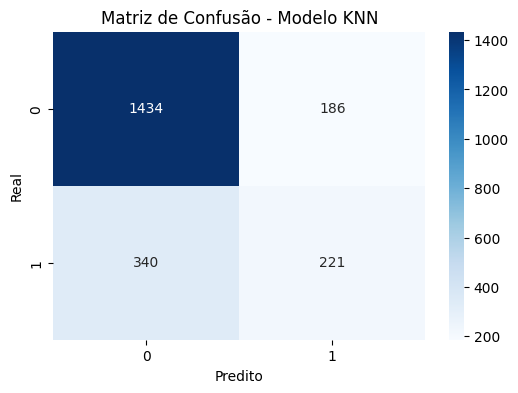

In [354]:
# Avaliar modelo KNeighborsClassifier
y_pred_knn = model_knn.predict(X_test)

print(f'Acurácia: {accuracy_score(y_test, y_pred_knn):.2%}')
print(f'Precisão: {precision_score(y_test, y_pred_knn):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_knn):.2%}')
print(f'F1-score: {f1_score(y_test, y_pred_knn):.2%}')

print('Matriz de confusão:')

cm = confusion_matrix(y_test, y_pred_knn)

# Plot com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo KNN")

plt.show()


Acurácia: 78.91%
Precisão: 60.95%
Recall: 50.09%
F1-score: 54.99%
Matriz de confusão:


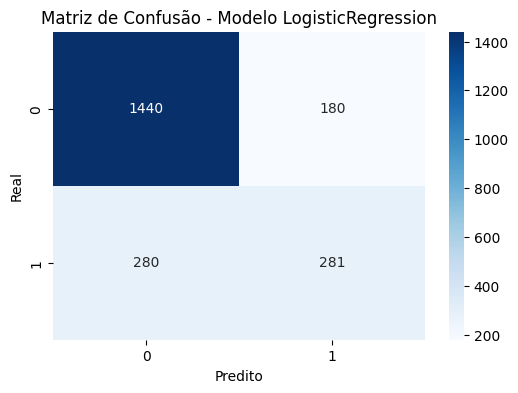

In [355]:

# Avaliar modelo LogisticRegression
# Probabilidades previstas
y_probs = model_logreg.predict_proba(X_test_normalizado)[:, 1]

# Ajustando o threshold
threshold = 0.3  # exemplo: mais baixo para aumentar recall
y_pred_logreg = (y_probs >= threshold).astype(int)


y_pred_logreg = model_logreg.predict(X_test_normalizado)

print(f'Acurácia: {accuracy_score(y_test, y_pred_logreg):.2%}')
print(f'Precisão: {precision_score(y_test, y_pred_logreg):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_logreg):.2%}')
print(f'F1-score: {f1_score(y_test, y_pred_logreg):.2%}')

print('Matriz de confusão:')

cm = confusion_matrix(y_test, y_pred_logreg)

# Plot com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo LogisticRegression")

plt.show()

Acurácia: 72.81%
Precisão: 47.12%
Recall: 46.70%
F1-score: 46.91%
Matriz de confusão:


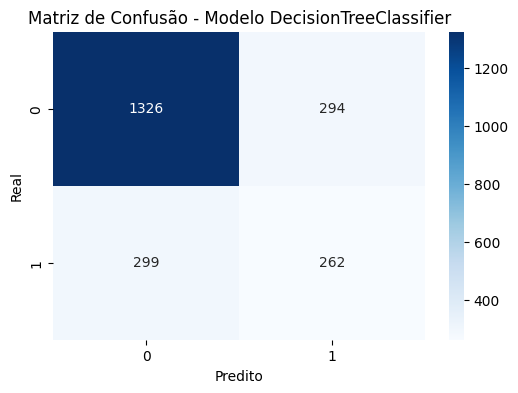

In [356]:
# Avaliar modelo DecisionTreeClassifier
y_pred_tree = model_tree.predict(X_test)

print(f'Acurácia: {accuracy_score(y_test, y_pred_tree):.2%}')
print(f'Precisão: {precision_score(y_test, y_pred_tree):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_tree):.2%}')
print(f'F1-score: {f1_score(y_test, y_pred_tree):.2%}')

print('Matriz de confusão:')

cm = confusion_matrix(y_test, y_pred_tree)

# Plot com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo DecisionTreeClassifier")

plt.show()


Acurácia: 77.76%
Precisão: 59.27%
Recall: 43.32%
F1-score: 50.05%
Matriz de confusão:


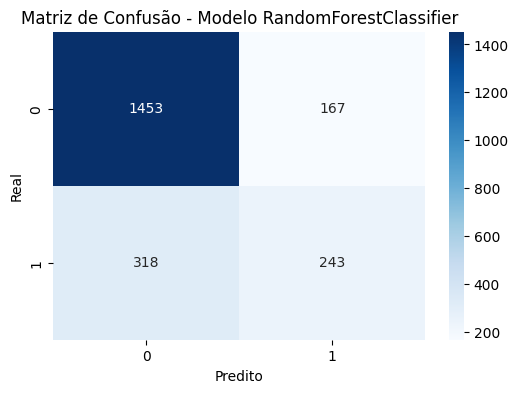

In [357]:
# Avaliar modelo RandomForestClassifier
y_pred_rfc = model_rfc.predict(X_test)

print(f'Acurácia: {accuracy_score(y_test, y_pred_rfc):.2%}')
print(f'Precisão: {precision_score(y_test, y_pred_rfc):.2%}')
print(f'Recall: {recall_score(y_test, y_pred_rfc):.2%}')
print(f'F1-score: {f1_score(y_test, y_pred_rfc):.2%}')

print('Matriz de confusão:')

cm = confusion_matrix(y_test, y_pred_rfc)

# Plot com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo RandomForestClassifier")

plt.show()

In [358]:
  # DataFrame de desempenho geral:
desempenho_geral =pd.DataFrame({'Modelo':['Dummy','KNN','Logistic Regression', 'Decision Tree','Random Forest'],
                    'Acurácia':[round(accuracy_score(y_test, y_pred_dummy)*100,2),
                                round(accuracy_score(y_test, y_pred_knn)*100,2),
                                round(accuracy_score(y_test, y_pred_logreg)*100,2),
                                round(accuracy_score(y_test, y_pred_tree)*100,2),
                                round(accuracy_score(y_test, y_pred_rfc)*100,2)],
                    'Precisão':[round(precision_score(y_test, y_pred_dummy)*100,2),
                                round(precision_score(y_test, y_pred_knn)*100,2),
                                round(precision_score(y_test, y_pred_logreg)*100,2),
                                round(precision_score(y_test, y_pred_tree)*100,2),
                                round(precision_score(y_test, y_pred_rfc)*100,2)],
                    'Recall':[round(recall_score(y_test, y_pred_dummy)*100,2),
                              round(recall_score(y_test, y_pred_knn)*100,2),
                              round(recall_score(y_test, y_pred_logreg)*100,2),
                              round(recall_score(y_test, y_pred_tree)*100,2),
                              round(recall_score(y_test, y_pred_rfc)*100,2)],
                    'F1-score':[round(f1_score(y_test, y_pred_dummy)*100,2),
                                round(f1_score(y_test, y_pred_knn)*100,2),
                                round(f1_score(y_test, y_pred_logreg)*100,2),
                                round(f1_score(y_test, y_pred_tree)*100,2),
                                round(f1_score(y_test, y_pred_rfc)*100,2)]})

desempenho_geral



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo,Acurácia,Precisão,Recall,F1-score
0,Dummy,74.28,0.00,0.00,0.00
1,KNN,75.88,54.30,39.39,45.66
2,Logistic Regression,78.91,60.95,50.09,54.99
3,Decision Tree,72.81,47.12,46.70,46.91
4,Random Forest,77.76,59.27,43.32,50.05


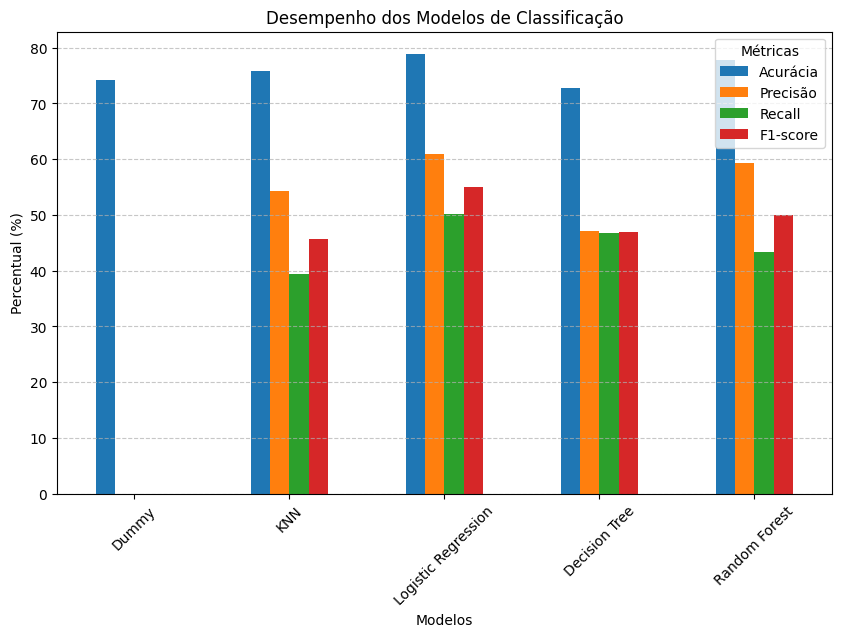

In [359]:
# Plotando gráfico comparativo
desempenho_geral.set_index('Modelo').plot(kind='bar', figsize=(10,6))
plt.title("Desempenho dos Modelos de Classificação")
plt.ylabel("Percentual (%)")
plt.xlabel("Modelos")
plt.xticks(rotation=45)
plt.legend(title="Métricas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


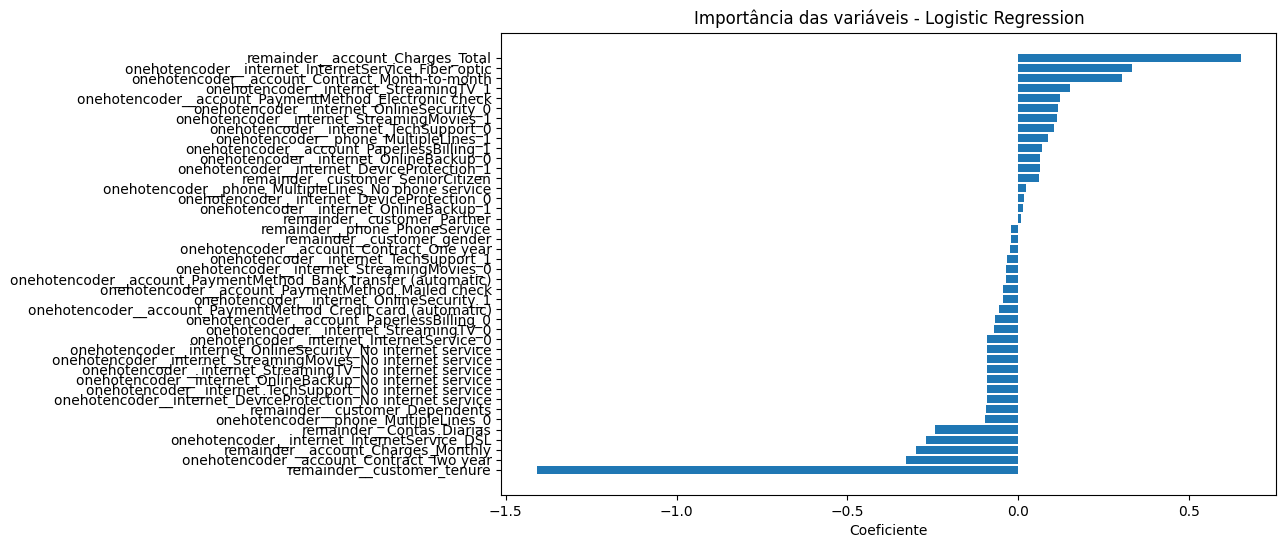

In [360]:
import pandas as pd
import matplotlib.pyplot as plt

coef = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': model_logreg.coef_[0]
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef['Variável'], coef['Importância'])
plt.title("Importância das variáveis - Logistic Regression")
plt.xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.show()


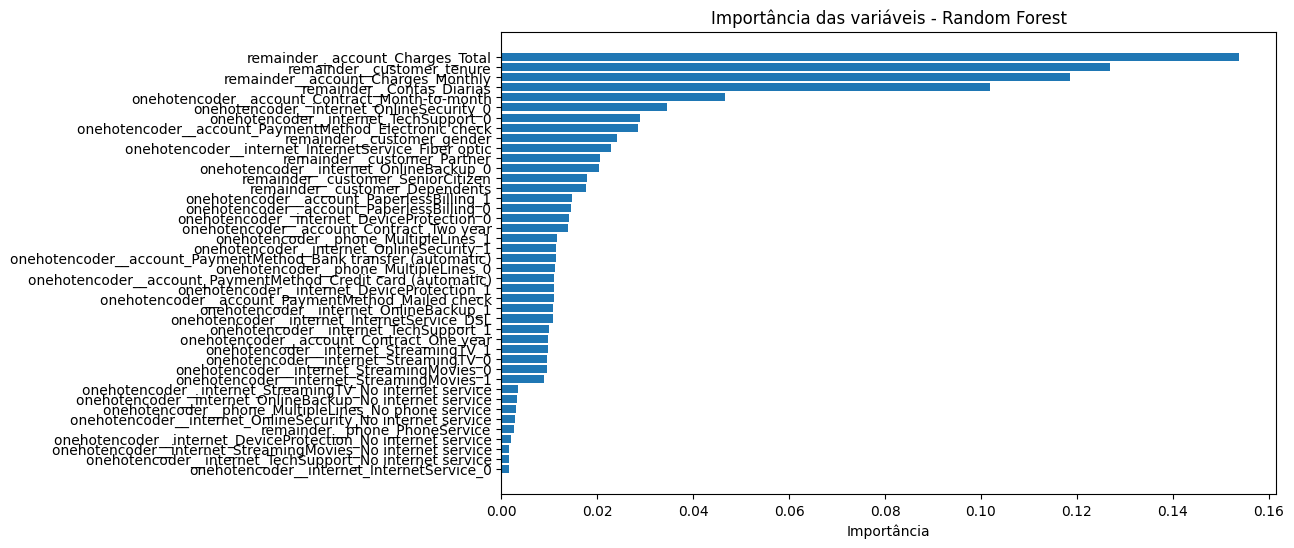

In [361]:
importances = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': model_rfc.feature_importances_
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importances['Variável'], importances['Importância'])
plt.title("Importância das variáveis - Random Forest")
plt.xlabel("Importância")
plt.gca().invert_yaxis()
plt.show()


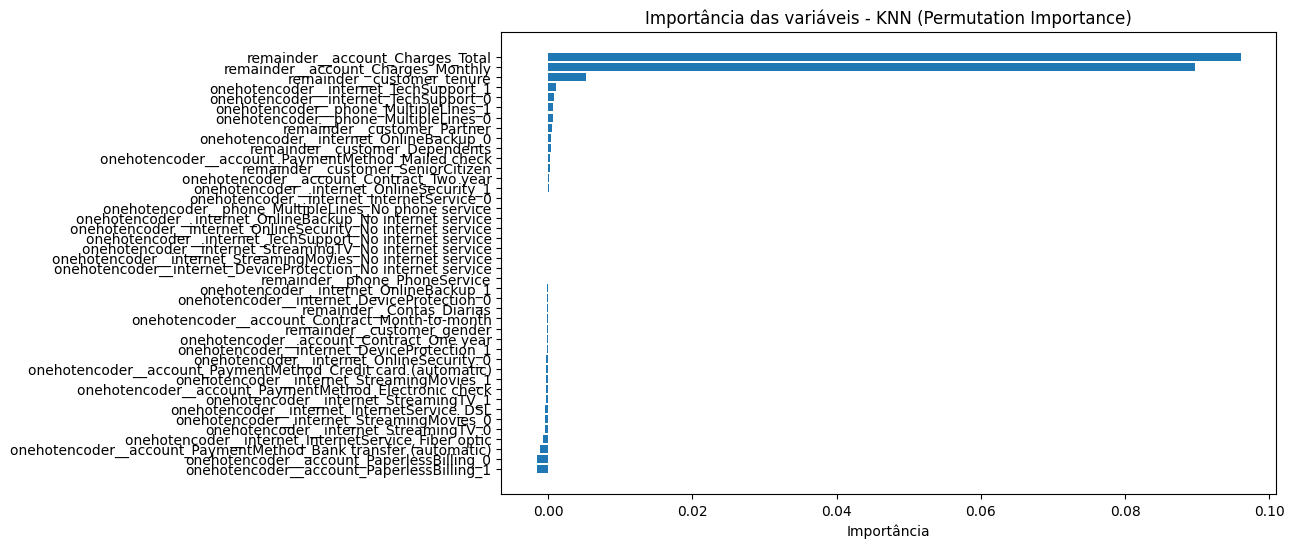

In [362]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_knn, X_test, y_test, n_repeats=10, random_state=42)

importances_knn = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': result.importances_mean
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importances_knn['Variável'], importances_knn['Importância'])
plt.title("Importância das variáveis - KNN (Permutation Importance)")
plt.xlabel("Importância")
plt.gca().invert_yaxis()
plt.show()


# 📝 Relatório Completo de Modelos de Previsão de Evasão
A análise dos modelos de classificação teve como objetivo identificar o algoritmo mais adequado  para prever a evasão de clientes e compreender os fatores que influenciam na ocorrência desse fenômeno. Foram usados os modelos <b>DummyClassifier, KNeighborsClassifier, Logistic Regression, Decision Tree e Random Forest</b>, e consideradas métricas de acurácia, precisão, recall e F1-score. Além disso, foi realizada uma investigação sobre as variáveis mais relevantes para a previsão de churn, a fim de propor estratégias de retenção alinhadas aos resultados.

# Análise de desempenho:
##  🏆 Melhor desempenho:
<b>Logistic Regression</b> é o modelo mais consistente para prever a evasão dos clientes:
* Maior acurácia
* Melhor equilíbrio entre precisão e recall
* Maior F1-score

## 🔎 Overfitting ou Underfitting:
* <b>DummyClassifier</b>: Desempenho nulo, serve apenas como baseline para os demais modelos.
* <b>KNeighborsClassifier</b>: Métricas medianas, mas recall baixo. Modelo não captura bem as tendências dos dados, indicando que está muito simples. <b>Underfitting </b>
* <b>LogisticRegression</b>: Bom equilíbrio, não mostra sinais claros de overfitting ou underfitting.
* <b>DecisionTree</b>: Sem restrições, o modelo aprendeu demais os dados de treino e perdeu o desempenhono teste, <b>Overfitting</b>.
* <b>RandomForest</b>: Razoável, mas não supera a regressão logística

## ⚙ Ajustes possíveis
* <b>KNeighborsClassifier</b>: Testar diferentes valores de k ou normalizar melhor os dados para reduzir underfitting
* <b>LogisticRegression</b>: Ajustar o threshold pode melhorar recall sem perder muito em precisão
* <b>DecisionTree</b>: Aplicar poda, limitar profundidade e número de folhas ou usar regularização para reduzir overfitting
* <b>RandomForest</b>: Aumentar número de árvores ou ajustar parâmetros para melhorar recall

# 📈 Fatores que Influenciam a Evasão
A análise das variáveis mais relevantes trouxe insights importantes:
* Mais meses de contrato têm menor probabilidade de evasão
* Cobranças totais altas apresentam maior risco de churn
* Contratos anuais ou bienais apresentam menor evasão devido à fidelidade
* Clientes com planos adicionais de segurança online e suporte técnico tendem a manter com seus contratos

## 🚀 Estratégias de Retenção Baseadas nos Dados

 <b>Planos de fidelidade</b>:
* Criar programas de fidelidade que ofereçam benefícios aos assinantes, como descontos, velocidade e serviços adicionais inclusos

<b>Gestão de Custos e Cobranças</b>:
* Revisar a política de preços e oferecer planos escalonados ou personalizados, adequados ao perfil de consumo.  
* Implementar campanhas de renegociação e comunicação transparente sobre cobranças, reduzindo a percepção de custo excessivo.  
* Foco especial em clientes com cobranças totais altas, pois apresentam maior risco de churn.  

<b>Incentivo a Contratos de Longo Prazo</b>:  
* Promover ofertas de migração de planos mensais para anuais ou bienais.  
* Oferecer descontos progressivos ou benefícios exclusivos para contratos de maior duração.  
* Aumentar a previsibilidade de receita e reduzir a evasão precoce.  

<b>Valorização de Serviços Adicionais</b>:  
* Expandir a oferta de serviços como segurança online e suporte técnico prioritário.  
* Incluir esses serviços como benefícios gratuitos ou com custo reduzido em planos de médio e alto valor.  
* Aumentar o engajamento e a percepção de valor, tornando o cliente menos propenso a cancelar.  



#🚩 Conclusão
De acordo com a análise, percebe-se que a evasão está fortemente ligada ao <b>tempo e tipo de contrato, valor das cobranãs e serviços adicionais</b>. As estratégias de retenção devem focar em:
* Planos de fidelidade de longo prazo, como programas de benefícios de acordo com o tempo de assinatura.
* Campanhas de migração para contratos de fidelidade
* Ofertas de planos acessíveis com serviços adicionais

Com essas ações, a TelecomX pode reduzir significativamente a evasão, aumentar a satisfação dos clientes e fortalecer sua base de receita recorrente.